In [92]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
import ternary
import matplotlib.ticker
import os
# plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (4, 4)

Sentiment analysis will be performed using VADER. VADER works best when the analysis is done at the sentence level. Thus the following strategy has been employed: <br>
- Using NTLK, paragraphs are broken down into sentences tokens for VADER . <br>
- Then the results are averaged for the whole paragraph. <br>

# Perform sentiment analysis for political

In total 75k tweets were examined which yielded 1745 replies.

In [93]:
pathTweetsG = "C:/Users/rejna/WS_semester3/FakeStatementsResearch/FakeNewsNet_modified/code/fakenewsnet_dataset/gossipcop/tweets"
pathTweetsP = "C:/Users/rejna/WS_semester3/FakeStatementsResearch/FakeNewsNet_modified/code/fakenewsnet_dataset/politifact/tweets"

P = pd.read_csv('Political/Data.csv')
del P['Unnamed: 0']
G = pd.read_csv('DataGossip.csv')
del G['Unnamed: 0']

In [94]:
analyser = SentimentIntensityAnalyzer()
def get_sentiment_analysis(sentence):
    """ Get the compound sentiment analysis score using VADER
    """
    
    score = analyser.polarity_scores(sentence)
    return score['neg'], score['neu'], score['pos'], score['compound']

### Get the content for every reply of every tweet.

In [95]:
replies_p = []
replies_g = []

# First gather the content of replies to tweets
for i, content in P.iterrows():
    try:
        replies_p.append(content.Content.split("@", content.Content.rfind("@"))[-1].split(" ",1)[1])
    except IndexError:
        continue

for i, content in G.iterrows():
    try:
        replies_g.append(content.Content.split("@", content.Content.rfind("@"))[-1].split(" ",1)[1])
    except IndexError:
        continue
        
# Next gather the content of tweets themselves
# for filename in os.listdir(pathTweetsG):
#     print("Processing file", filename,"...")
#     data = pd.read_csv(pathTweetsG+"/"+filename)
#     if len(data) > 0:
#         try:
#             for index, content in data.iterrows():
#                 replies_g.append(content.text)
#         except:
#             continue
        
# for filename in os.listdir(pathTweetsP):
#     print("Processing file", filename,"...")
#     data = pd.read_csv(pathTweetsP+"/"+filename)
#     if len(data) > 0:
#         try:
#             for index, content in data.iterrows():
#                 replies_p.append(content.text)
#         except:
#             continue

### Perform the study of Tweets themselves

In [96]:
print("Total amount of replies for political",len(replies_p))
print("Total amount of replies for gossip",len(replies_g))

Total amount of replies for political 1679
Total amount of replies for gossip 5422


### Get sentiment analysis

In [97]:
compound_score_p = []
compound_p = []

for reply in replies_p:
    neg, neu, pos, com = get_sentiment_analysis(reply)
    compound_p.append(com)
    if sum([neg,neu,pos]) <= 1:
        compound_score_p.append((neg*10, neu*10, pos*10))
        
compound_score_g = []
compound_g = []

for reply in replies_g:
    neg, neu, pos, com = get_sentiment_analysis(reply)
    compound_g.append(com)
    if sum([neg,neu,pos]) <= 1:
        compound_score_g.append((neg*10, neu*10, pos*10))

# Ternary Plots
don't forget to cite the paper!
https://github.com/marcharper/python-ternary/blob/master/CITATION.md

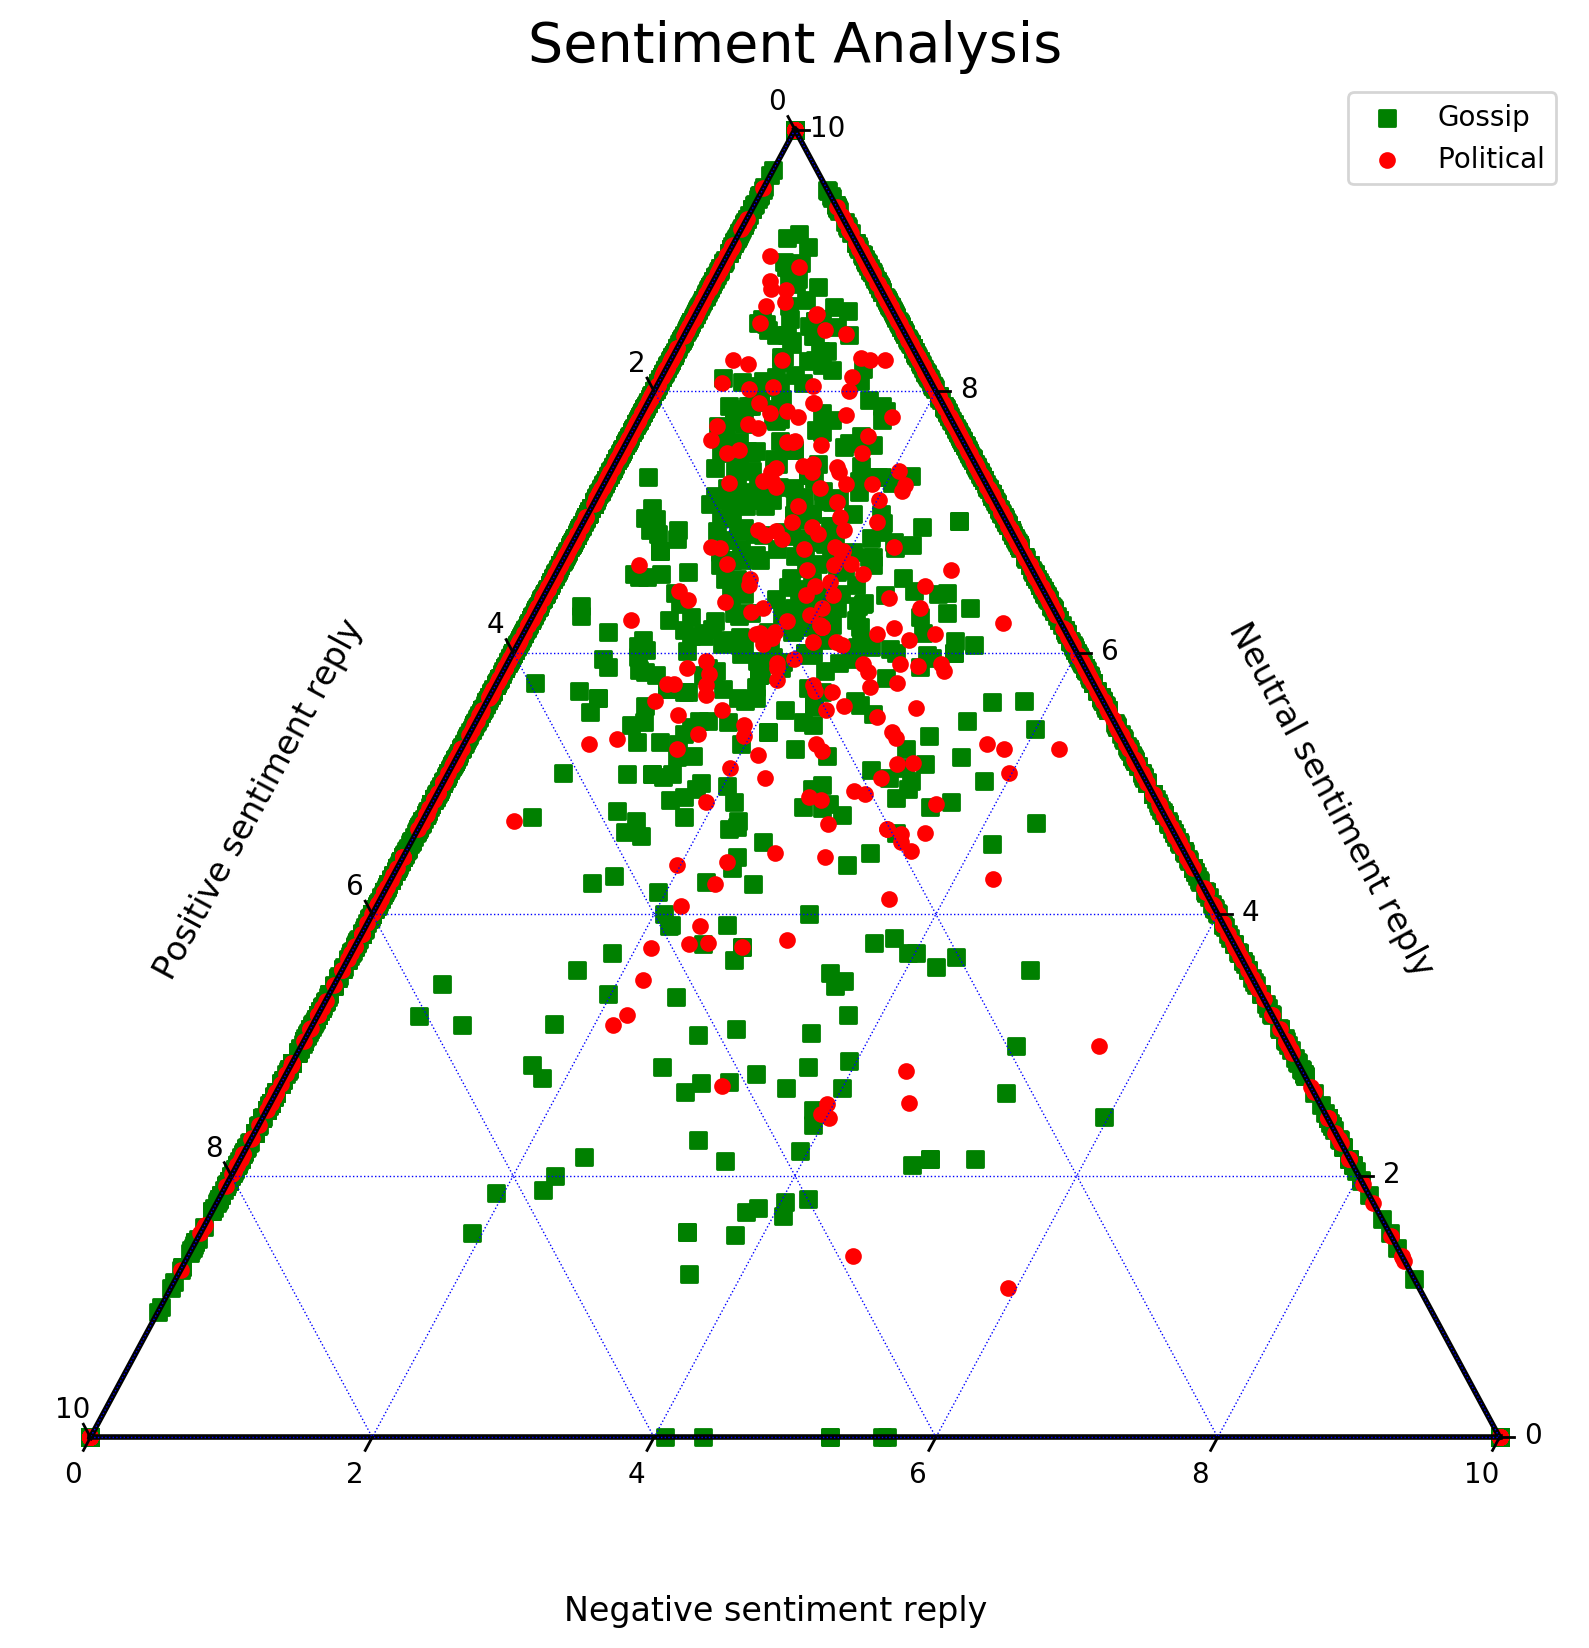

In [98]:
scale = 10
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

tax.scatter(compound_score_g, marker='s', color='green', label="Gossip")
tax.scatter(compound_score_p, marker='o', color='red', label="Political", s=25)
tax.legend()

tax.set_title("Sentiment Analysis", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=2, color="blue")
tax.ticks(axis='lbr', linewidth=1, multiple=2)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.right_axis_label("Neutral sentiment reply", fontsize=12, offset=0.14)
tax.left_axis_label("Positive sentiment reply", fontsize=12, offset=0.14)
tax.bottom_axis_label("Negative sentiment reply", fontsize=12, offset=0.05)


tax.show()

# The compound score for all the tweet's content

In [84]:
print("Compound score for all the tweet content for politifact",sum(compound_p)/len(compound_p))

Compound score for all the tweet content for politifact -0.14364093016698096


In [85]:
print("Compound score for all the tweet content for gossip",sum(compound_g)/len(compound_g))

Compound score for all the tweet content for gossip 0.06747215731857342


# The compound score for the replies of all tweets

In [99]:
print("Compund score for all the replies of tweets for politifact",sum(compound_p)/len(compound_p))

Compund score for all the replies of tweets for politifact -0.009778082191780807


In [100]:
print("Compund score for all the replies of tweets for gossipcop",sum(compound_g)/len(compound_g))

Compund score for all the replies of tweets for gossipcop 0.106962818148285
